# Indexing Linked Data

*Author: Philippe Renzen*

## Knowledge Graph of Dataset

The example ontology consists mostly of entities, most are connected to litterals. The knowledge graph illustrates a simple example of a dataset for linked data information retrieval.

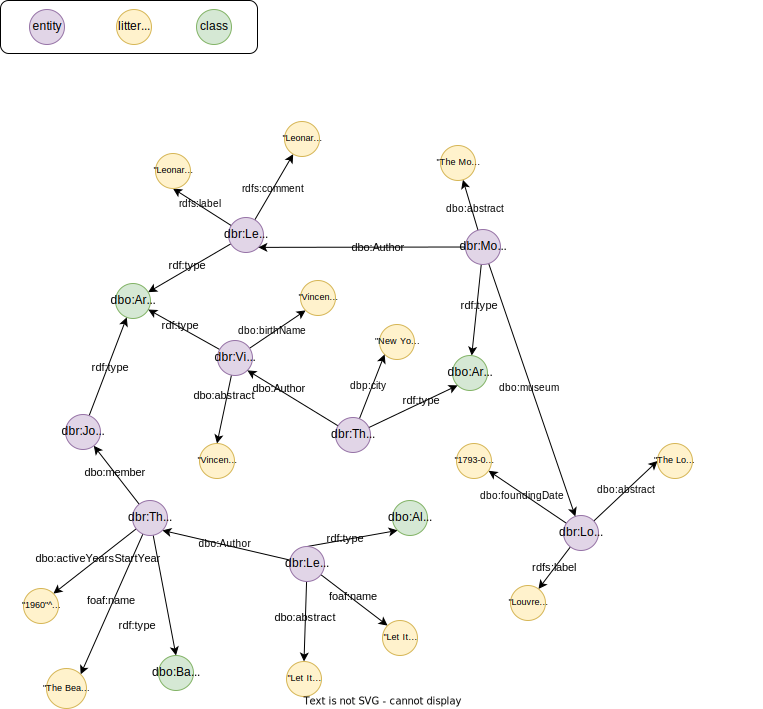

In [ ]:
from IPython.core.display import SVG
SVG(filename='/content/Example_linkeddata_graph.svg')

## Virtual Document & Inverted Index

We manually make a `dictionary`, which represents the datasets knowledge graph. Each item in the dictionary represents a triple and contains the keys: subject, object, and predicate (`s p o`). The the content of the item is used to create the virtual documents later in this notebook.

In [ ]:
# making a dictionary of triples ~ Basic Index


index_ = {1: {'subject': "https://dbpedia.org/resource/Leonardo_da_Vinci", 'predicate': "https://dbpedia.org/ontology/abstract", 'object': "Leonardo da Vinci (15 April 1452 – 2 May 1519) was an Italian polymath of the High Renaissance who was active as a painter, draughtsman, engineer, scientist, theorist, sculptor and architect. While his fame initially rested on his achievements as a painter, he also became known for , in which he made drawings and notes on a variety of subjects, including anatomy, astronomy, botany, cartography, painting, and paleontology. Leonardo's genius epitomized the Renaissance humanist ideal, and his collective works compose a contribution to later generations of artists matched only by that of his younger contemporary, Michelangelo. Born out of wedlock to a successful notary and a lower-class woman in, or near, Vinci, he was educated in Florence by the Italian painter and sculptor Andrea del Verrocchio. He began his career in the city, but then spent much time in the service of Ludovico Sforza in Milan. Later, he worked in Florence and Milan again, as well as briefly in Rome, all while attracting a large following of imitators and students. Upon the invitation of Francis I, he spent his last three years in France, where he died in 1519. Since his death, there has not been a time where his achievements, diverse interests, personal life, and empirical thinking have failed to incite interest and admiration, making him a frequent namesake and subject in culture. Leonardo is among the greatest painters in the history of art and is often credited as the founder of the High Renaissance. Despite having many lost works and less than 25 attributed major works—including numerous unfinished works—he created some of the most influential paintings in Western art. His magnum opus, the Mona Lisa, is his best known work and often regarded as the world's most famous painting. The Last Supper is the most reproduced religious painting of all time and his Vitruvian Man drawing is also regarded as a cultural icon. In 2017, Salvator Mundi, attributed in whole or part to Leonardo, was sold at auction for US$450.3 million, setting a new record for the most expensive painting ever sold at public auction. Revered for his technological ingenuity, he conceptualized flying machines, a type of armored fighting vehicle, concentrated solar power, an adding machine, and the double hull. Relatively few of his designs were constructed or even feasible during his lifetime, as the modern scientific approaches to metallurgy and engineering were only in their infancy during the Renaissance. Some of his smaller inventions, however, entered the world of manufacturing unheralded, such as an automated bobbin winder and a machine for testing the tensile strength of wire. He made substantial discoveries in anatomy, civil engineering, hydrodynamics, geology, optics, and tribology, but he did not publish his findings and they had little to no direct influence on subsequent science."},
2: {'subject':"https://dbpedia.org/resource/Leonardo_da_Vinci", 'predicate':"https://www.w3.org/2000/01/rdf-schema#comment", 'object':"Leonardo da Vinci (15 April 1452 – 2 May 1519) was an Italian polymath of the High Renaissance who was active as a painter, draughtsman, engineer, scientist, theorist, sculptor and architect. While his fame initially rested on his achievements as a painter, he also became known for , in which he made drawings and notes on a variety of subjects, including anatomy, astronomy, botany, cartography, painting, and paleontology. Leonardo's genius epitomized the Renaissance humanist ideal, and his collective works compose a contribution to later generations of artists matched only by that of his younger contemporary, Michelangelo."},
3: {'subject':"https://dbpedia.org/resource/Leonardo_da_Vinci", 'predicate':"https://www.w3.org/2000/01/rdf-schema#label", 'object':"Leonardo da Vinci"},
4: {'subject':"https://dbpedia.org/resource/Leonardo_da_Vinci", 'predicate':"https://www.w3.org/1999/02/22-rdf-syntax-ns#type", 'object':"https://dbpedia.org/resource/Artist"},
5: {'subject':"https://dbpedia.org/resource/Leonardo_da_Vinci", 'predicate':"https://dbpedia.org/ontology/author", 'object':"https://dbpedia.org/resource/Mona_Lisa"},
6: {'subject':"https://dbpedia.org/resource/Mona_Lisa", 'predicate':"https://dbpedia.org/ontology/author", 'object':"https://dbpedia.org/resource/Leonardo_da_Vinci"},
7: {'subject':"https://dbpedia.org/resource/Mona_Lisa", 'predicate':"https://dbpedia.org/ontology/abstract", 'object':'The Mona Lisa (/ˌmoʊnə ˈliːsə/; Italian: Monna Lisa [ˈmɔnna ˈliːza] or La Gioconda [la dʒoˈkonda], French: La Joconde [la ʒɔkɔ̃d]) is a half-length portrait of a woman by the Italian artist Leonardo da Vinci, which has been acclaimed as "the best known, the most visited, the most written about, the most sung about, the most parodied work of art in the world". The painting, thought to be a portrait of Lisa Gherardini, the wife of Francesco del Giocondo, is in oil on a white Lombardy poplar panel, and is believed to have been painted between 1503 and 1506. Leonardo may have continued working on it as late as 1517. It was acquired by King Francis I of France and is now the property of the French Republic, on permanent display at the Louvre Museum in Paris since 1797. The subject\'s expression, which is frequently described as enigmatic, the monumentality of the composition, the subtle modelling of forms, and the atmospheric illusionism were novel qualities that have contributed to the continuing fascination and study of the work.'},
8: {'subject':"https://dbpedia.org/resource/Mona_Lisa", 'predicate':"https://www.w3.org/1999/02/22-rdf-syntax-ns#type", 'object':"https://dbpedia.org/ontology/Artwork"},
9: {'subject':"https://dbpedia.org/resource/Mona_Lisa", 'predicate':"https://dbpedia.org/ontology/museum", 'object':"https://dbpedia.org/resource/Louvre"},
10: {'subject': "http://dbpedia.org/resource/Louvre", 'predicate':"https://dbpedia.org/ontology/foundingDate", 'object':"1793-08-10"},
11: {'subject': "http://dbpedia.org/resource/Louvre", 'predicate':"https://www.w3.org/2000/01/rdf-schema#label", 'object':"Louvre"},
12: {'subject': "http://dbpedia.org/resource/Louvre", 'predicate':"https://dbpedia.org/ontology/abstract", 'object':"The Louvre or the Louvre Museum (French: Musée du Louvre, pronounced: [myze dy luvʁ]) (French ) is the world's  largest museum and a historic monument in Paris, France. A central landmark of the city, it is located on the Right Bank of the Seine in the city's 1st arrondissement (district or ward). Nearly 35,000 objects from prehistory to the 21st century are exhibited over an area of 60,600 square metres (652,300 square feet). The Louvre is the world's second most visited museum after the Palace Museum in China, receiving more than 9.26 million visitors in 2014. The museum is housed in the Louvre Palace, originally built as a fortress in the late 12th century under Philip II. Remnants of the fortress are visible in the basement of the museum. Due to the urban expansion of the city, the fortress eventually lost its defensive function and, in 1546, was converted by Francis I of France into the main residence of the French Kings. The building was extended many times to form the present Louvre Palace. In 1682, Louis XIV chose the Palace of Versailles for his household, leaving the Louvre primarily as a place to display the royal collection, including, from 1692, a collection of ancient Greek and Roman sculpture. In 1692, the building was occupied by the Académie des Inscriptions et Belles Lettres and the Académie Royale de Peinture et de Sculpture, which in 1699 held the first of a series of salons. The Académie remained at the Louvre for 100 years. During the French Revolution, the National Assembly decreed that the Louvre should be used as a museum to display the nation's masterpieces. The museum opened on 10 August 1793 with an exhibition of 537 paintings, the majority of the works being royal and confiscated church property. Because of structural problems with the building, the museum was closed in 1796 until 1801. The collection was increased under Napoleon and the museum renamed the Musée Napoléon, but after Napoleon's abdication many works seized by his armies were returned to their original owners. The collection was further increased during the reigns of Louis XVIII and Charles X, and during the Second French Empire the museum gained 20,000 pieces. Holdings have grown steadily through donations and bequests since the Third Republic. The collection is divided among eight curatorial departments: Egyptian Antiquities; Near Eastern Antiquities; Greek, Etruscan and Roman Antiquities; Islamic Art; Sculpture; Decorative Arts; Paintings; Prints and Drawings" },
13: {'subject': "https://dbpedia.org/resource/Vincent_van_Gogh", 'predicate':"https://www.w3.org/1999/02/22-rdf-syntax-ns#type", 'object':"https://dbpedia.org/resource/Artist"},
14: {'subject': "https://dbpedia.org/resource/Vincent_van_Gogh", 'predicate':"https://dbpedia.org/ontology/abstract", 'object':"('Van Gogh' redirects here. For other uses, see Van Gogh (disambiguation).) Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪləm vɑn ˈɣɔx] ; 30 March 1853 – 29 July 1890) was a Dutch Post-Impressionist painter who is among the most famous and influential figures in the history of Western art. In just over a decade he created about 2100 artworks, including around 860 oil paintings, most of them in the last two years of his life. They include landscapes, still lifes, portraits and self-portraits, and are characterised by bold, symbolic colours, and dramatic, impulsive and highly expressive brushwork that contributed to the foundations of modern art. He sold only one painting during his lifetime and became famous after his suicide at age 37, which followed years of poverty and mental illness. Born into an upper-middle-class family, Van Gogh drew as a child and was serious, quiet and thoughtful, but showed signs of mental instability. As a young man he worked as an art dealer, often travelling, but became depressed after he was transferred to London. He turned to religion, and spent time as a missionary in southern Belgium. Later he drifted in ill health and solitude. He was keenly aware of modernist trends in art and, while back with his parents, took up painting in 1881. His younger brother, Theo, supported him financially, and the two kept up a long correspondence by letter. Van Gogh's early works, mostly still lifes and depictions of peasant labourers, contain few signs of the vivid colour that distinguished his later work. In 1886 he moved to Paris and became interested in the French Impressionists. As his work developed he created a new approach to still lifes and local landscapes. His paintings grew brighter in colour as he developed a style that became fully realised during his stay in Arles in the south of France in 1888. He lived there in the Yellow House and, with the French artist Paul Gauguin, developed a concept of colour that symbolised inner emotion. During this period he broadened his subject matter to include olive trees, cypresses, wheat fields and sunflowers. Van Gogh suffered from psychotic episodes and delusions and, though he worried about his mental stability, he often neglected his physical health, not eating properly and drinking heavily. His friendship with Gauguin came to an end after he threatened the Frenchman with a razor, and in a rage, cut off part of his own left ear. While in a psychiatric hospital in Saint-Rémy his condition stabilised, leading to one of the more productive periods of his life. He moved to the Auberge Ravoux in Auvers-sur-Oise near Paris under the care of the homeopathic doctor and artist, Paul Gachet. On 27 July 1890, Van Gogh shot himself in the chest with a revolver. He died from his injuries two days later. Considered a madman and a failure in his lifetime, Van Gogh exists in the public imagination as the quintessential misunderstood genius, the artist 'where discourses on madness and creativity converge'. His reputation began to grow in the early 20th century as elements of his painting style came to be incorporated by the Fauves and German Expressionists. He attained widespread critical, commercial and popular success over the ensuing decades, and is remembered as an important but tragic painter, whose troubled personality typifies the romantic ideal of the tortured artist."},
15: {'subject': "https://dbpedia.org/resource/Vincent_van_Gogh", 'predicate':"https://dbpedia.org/ontology/birthName", 'object':"Vincent Willem van Gogh"},
16: {'subject': "https://dbpedia.org/resource/The_Starry_Night", 'predicate':"https://dbpedia.org/ontology/author",'object':"https://dbpedia.org/resource/Vincent_van_Gogh"},
17: {'subject': "https://dbpedia.org/resource/The_Starry_Night", 'predicate':"https://dbpedia.org/property/city",'object':"New York City"},
18: {'subject': "https://dbpedia.org/resource/The_Starry_Night", 'predicate':"https://www.w3.org/1999/02/22-rdf-syntax-ns#type", 'object':"https://dbpedia.org/ontology/Artwork"},
19: {'subject': "https://dbpedia.org/resource/John_Lennon", 'predicate':"https://www.w3.org/1999/02/22-rdf-syntax-ns#type", 'object':"https://dbpedia.org/resource/Artist"},
20: {'subject': "https://dbpedia.org/resource/The_Beatles", 'predicate':"https://dbpedia.org/ontology/member", 'object':"https://dbpedia.org/resource/John_Lennon"},
21: {'subject': "https://dbpedia.org/resource/The_Beatles", 'predicate':"https://dbpedia.org/ontology/activeYearsStartYear", 'object':"1960"},
22: {'subject': "https://dbpedia.org/resource/The_Beatles", 'predicate':"http://xmlns.com/foaf/0.1/name", 'object':"The Beatles"},
23: {'subject': "https://dbpedia.org/resource/The_Beatles", 'predicate':"https://www.w3.org/1999/02/22-rdf-syntax-ns#type", 'object':"https://dbpedia.org/ontology/Band"},
24: {'subject': "https://dbpedia.org/resource/Let_It_Be_(Beatles_album)", 'predicate':"https://dbpedia.org/ontology/author", 'object':"https://dbpedia.org/resource/The_Beatles"},
25: {'subject': "https://dbpedia.org/resource/Let_It_Be_(Beatles_album)", 'predicate':"https://www.w3.org/1999/02/22-rdf-syntax-ns#type", 'object':"https://dbpedia.org/ontology/Album"},
26: {'subject': "https://dbpedia.org/resource/Let_It_Be_(Beatles_album)", 'predicate':"http://xmlns.com/foaf/0.1/name", 'object':"Let It Be"},
27: {'subject': "https://dbpedia.org/resource/Let_It_Be_(Beatles_album)", 'predicate':"https://dbpedia.org/ontology/abstract" , 'object':"Let It Be is the twelfth and final studio album by the English rock band the Beatles. It was released on 8 May 1970, almost a month after the group's break-up, in tandem with the motion picture of the same name. Like most of the band's previous releases, the album topped charts in many countries, including both the US and the UK. The critical response was generally unfavourable, and Let It Be came to be regarded as one of the most controversial rock albums in history. Rehearsals began at Twickenham Film Studios in January 1969 as part of a planned television documentary showing the Beatles' return to live performance. Paul McCartney conceived the project as an attempt to reinvigorate the band by returning to simpler rock and roll configurations. The filmed rehearsals were marked by ill feeling, leading to George Harrison's temporary departure from the group. As a condition of his return, the members reconvened at their own Apple Studio, and guest keyboardist Billy Preston was brought in to contribute. The project yielded a single public concert held on the studio's rooftop on 30 January, from which three of the album's tracks were drawn. In April 1969, the Beatles issued the single 'Get Back', after which engineer Glyn Johns prepared and submitted mixes of the album – titled Get Back and subsequently rejected by the band. The project then lay in limbo as they moved onto the recording of Abbey Road, released that September. In January 1970, four months after John Lennon's departure from the group, the remaining Beatles finished the album with the completion of 'Let It Be' and 'I Me Mine'. The former was issued as a single in March 1970, and like all the album's recording to this point, was produced by George Martin. When the documentary project was resurrected for a cinema release, as Let It Be, Lennon and Harrison asked American producer Phil Spector to assemble the accompanying album. Among Spector's changes was to include a 1968 take of 'Across the Universe' and apply orchestral and choral overdubs to four tracks. His work offended McCartney, particularly in the case of 'The Long and Winding Road'. In 2003, McCartney spearheaded Let It Be... Naked, an alternative version of Let It Be that removes Spector's embellishments. In 2021, a remixed and expanded edition of Let It Be was released with session highlights and the original 1969 Get Back mix."}}
index = index_.copy()


In [ ]:
index[8]['subject']

'https://dbpedia.org/resource/Mona_Lisa'

To create the virtual documents we initially add a new key `description` to the dictionary for each triple, containing an empty string. We add the `s p o` string values to the description, creating a simple virtual document for each triple.

In [ ]:
# adding a description to the the basic index (description contains all lower case subjects, objects and predicates)
for id in index.keys():
    description = ""
    description += ' ' + str(index[id]['subject']) + ' ' + str(index[id]['predicate']) + ' ' + str(index[id]['object'])    
    description = description.lower()

    index[id]['description'] = description

Now that the virtual documents are generated, we can create the inverted index. We initially create a dictionary list item, where the tokens (words) in the document will become the keys of the index. For each token in the set of tokens in the document, create a new token key if the word was not seen in the dictionary before, then append the document number to this token key in the dictionary. When using a token as key for the inverted index, we retrieve all document numbers where this term appears.

In [ ]:
from collections import defaultdict

inverted_index = defaultdict(list) # creating dictionairy

# This can take a few seconds:
for id in index.keys():         # ids of triples
    term_set = set(index[id]['description'].split(' '))
    for term in term_set:
        inverted_index[term].append(id) # append each id where term occurs

In [ ]:
result = inverted_index['beatles']
result

[22, 27]

In [ ]:
for id in result:
  print(index[id]['subject'], index[id]['predicate'], index[id]['object'])

https://dbpedia.org/resource/The_Beatles http://xmlns.com/foaf/0.1/name The Beatles
https://dbpedia.org/resource/Let_It_Be_(Beatles_album) https://dbpedia.org/ontology/abstract Let It Be is the twelfth and final studio album by the English rock band the Beatles. It was released on 8 May 1970, almost a month after the group's break-up, in tandem with the motion picture of the same name. Like most of the band's previous releases, the album topped charts in many countries, including both the US and the UK. The critical response was generally unfavourable, and Let It Be came to be regarded as one of the most controversial rock albums in history. Rehearsals began at Twickenham Film Studios in January 1969 as part of a planned television documentary showing the Beatles' return to live performance. Paul McCartney conceived the project as an attempt to reinvigorate the band by returning to simpler rock and roll configurations. The filmed rehearsals were marked by ill feeling, leading to George

As illustrated, the inverted index only works for single keyword search. However, a user query string with multiple keywords is possible with Boolean Retrieval methods (quering the index for each token in the query string, and returning the intersection or union of the given documents).

A noticible problem is that there is a lot of data contained in the IRI that is not retrieved. Moreover,  there are inconsistencies in word forms and capitalization that might not be relevant. Therefore, lemmatization, removal of stopwords, special characters, and saving lowercase tokens will be considered. This will significantly decreases the size of the inverted index. Regarding retrieval, recall will be improved enormously and precision will slightly decrease when the user query string is preprocessed in the same manner as the virtual documents.

## Improved Document Processing & Indexing

Noticing that not all Beatle related triples are retrieved! Let's update the processing methods.

In [ ]:
index = index_.copy()

In [ ]:
from urllib.parse import urlparse
import nltk
import re
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# text preprocessing function for the uri | returns virtual document
def URI_processing(URI):
  final = ''
  # getting resource name from IRI
  resource = re.split('#|/',URI)[-1]
  # getting domain name from IRI
  domain = urlparse(URI).netloc
  # remove camelcase from IRI     
  un_camel_list = re.split('(?=[A-Z])', resource) 
  un_camel = ' '.join(un_camel_list).lower() 
  # remove underscores from IRI
  cleaned_resource = un_camel.replace('_',' ')

  final += ' ' + URI + ' ' + domain + ' ' + resource + ' ' + cleaned_resource.lower() + ' ' + un_camel # data from URI

  return final


def litteral_processing(litteral):
  #removes special chars
  litteral = re.sub('[^A-Za-z0-9]+', ' ', litteral)
  #removes non ASCII
  litteral = re.sub('[^\x00-\x7F]+', ' ', litteral)
  #lowering litteral
  litteral = litteral.lower()
  #removes numbers
  litteral = re.sub('\d+', ' ', litteral)
  #removes stopwords
  litteral = ' '.join([word for word in litteral.split() if word not in stop_words])
  #lemmaziter
  litteral = ' '.join([lemmatizer.lemmatize(word) for word in litteral.split()])
  #removes double spaces
  litteral = re.sub(' +', ' ', litteral)

  return litteral


for id in index.keys():
  sub = index[id]['subject']
  pred =index[id]['predicate']
  obj = index[id]['object']
  description = ""

  description += URI_processing(sub) + URI_processing(pred)
  
  # OBJECT CAN BE URI OR LITTERAL
  if obj[:5] == 'http':
    description += URI_processing(obj) # treat the object as an IRI

  # in case the object is a litteral:
  else:
    description += ' ' + litteral_processing(obj) # processing litteral

  index[id]['description'] = description


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from collections import defaultdict

inverted_index = defaultdict(list) # creating dictionairy

# This can take a few seconds:
for id in index.keys():         # ids of triples
    term_set = set(index[id]['description'].split(' '))
    for term in term_set:
        inverted_index[term].append(id) # append each id where term occurs

In [ ]:
index

{1: {'description': ' https://dbpedia.org/resource/Leonardo_da_Vinci dbpedia.org Leonardo_da_Vinci  leonardo da  vinci  leonardo_da_ vinci https://dbpedia.org/ontology/abstract dbpedia.org abstract abstract abstract leonardo da vinci april may italian polymath high renaissance active painter draughtsman engineer scientist theorist sculptor architect fame initially rested achievement painter also became known made drawing note variety subject including anatomy astronomy botany cartography painting paleontology leonardo genius epitomized renaissance humanist ideal collective work compose contribution later generation artist matched younger contemporary michelangelo born wedlock successful notary lower class woman near vinci educated florence italian painter sculptor andrea del verrocchio began career city spent much time service ludovico sforza milan later worked florence milan well briefly rome attracting large following imitator student upon invitation francis spent last three year fra

In [ ]:
result = inverted_index['beatles']
result

[20, 21, 22, 23, 24, 25, 26, 27]

In [ ]:
result = inverted_index[litteral_processing('beatles')]
result

[20, 21, 22, 23, 24, 25, 26, 27]

In [ ]:
for id in result:
  print(index[id]['subject'], index[id]['predicate'], index[id]['object'])

https://dbpedia.org/resource/The_Beatles https://dbpedia.org/ontology/member https://dbpedia.org/resource/John_Lennon
https://dbpedia.org/resource/The_Beatles https://dbpedia.org/ontology/activeYearsStartYear 1960
https://dbpedia.org/resource/The_Beatles http://xmlns.com/foaf/0.1/name The Beatles
https://dbpedia.org/resource/The_Beatles https://www.w3.org/1999/02/22-rdf-syntax-ns#type https://dbpedia.org/ontology/Band
https://dbpedia.org/resource/Let_It_Be_(Beatles_album) https://dbpedia.org/ontology/author https://dbpedia.org/resource/The_Beatles
https://dbpedia.org/resource/Let_It_Be_(Beatles_album) https://www.w3.org/1999/02/22-rdf-syntax-ns#type https://dbpedia.org/ontology/Album
https://dbpedia.org/resource/Let_It_Be_(Beatles_album) http://xmlns.com/foaf/0.1/name Let It Be
https://dbpedia.org/resource/Let_It_Be_(Beatles_album) https://dbpedia.org/ontology/abstract Let It Be is the twelfth and final studio album by the English rock band the Beatles. It was released on 8 May 1970, a

We get 8 results!

The processing could be improved further, with for example lemmatization and stopword removal, however it is currently very informative for the Sonic indexing system, therefore we will export all the documnents to json.

In [ ]:
def inverted_index_search(search_term):
  search = inverted_index[search_term]
  print(f'The results for {search_term}:')
  for id in search:
    print(index[id]['subject'], index[id]['predicate'], index[id]['object'])

In [ ]:
inverted_index_search('museum')

The results for museum:
https://dbpedia.org/resource/Mona_Lisa https://dbpedia.org/ontology/abstract The Mona Lisa (/ˌmoʊnə ˈliːsə/; Italian: Monna Lisa [ˈmɔnna ˈliːza] or La Gioconda [la dʒoˈkonda], French: La Joconde [la ʒɔkɔ̃d]) is a half-length portrait of a woman by the Italian artist Leonardo da Vinci, which has been acclaimed as "the best known, the most visited, the most written about, the most sung about, the most parodied work of art in the world". The painting, thought to be a portrait of Lisa Gherardini, the wife of Francesco del Giocondo, is in oil on a white Lombardy poplar panel, and is believed to have been painted between 1503 and 1506. Leonardo may have continued working on it as late as 1517. It was acquired by King Francis I of France and is now the property of the French Republic, on permanent display at the Louvre Museum in Paris since 1797. The subject's expression, which is frequently described as enigmatic, the monumentality of the composition, the subtle model

In [ ]:
inverted_index_search('birth')

The results for birth:
https://dbpedia.org/resource/Vincent_van_Gogh https://dbpedia.org/ontology/birthName Vincent Willem van Gogh


In [ ]:
inverted_index_search('name')

The results for name:
https://dbpedia.org/resource/Vincent_van_Gogh https://dbpedia.org/ontology/birthName Vincent Willem van Gogh
https://dbpedia.org/resource/The_Beatles http://xmlns.com/foaf/0.1/name The Beatles
https://dbpedia.org/resource/Let_It_Be_(Beatles_album) http://xmlns.com/foaf/0.1/name Let It Be
https://dbpedia.org/resource/Let_It_Be_(Beatles_album) https://dbpedia.org/ontology/abstract Let It Be is the twelfth and final studio album by the English rock band the Beatles. It was released on 8 May 1970, almost a month after the group's break-up, in tandem with the motion picture of the same name. Like most of the band's previous releases, the album topped charts in many countries, including both the US and the UK. The critical response was generally unfavourable, and Let It Be came to be regarded as one of the most controversial rock albums in history. Rehearsals began at Twickenham Film Studios in January 1969 as part of a planned television documentary showing the Beatles

Ranking is not considered in this notebook, but for more information regarding TF-IDF ranking please visit: https://www.geeksforgeeks.org/tf-idf-model-for-page-ranking/#:~:text=tf%2Didf%20stands%20for%20Term,document's%20relevance%20given%20a%20query.

Creating a JSON file for the SONIC index.

In [ ]:
import json

with open('data.json', 'w') as fp:
    json.dump(index, fp)

## Downloading the index dictionary

In [ ]:
# Download the file.
from google.colab import files
files.download('data.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>